In [32]:
from scipy.io import loadmat
import numpy as np
import pandas as pd

In [33]:
data=loadmat("powerTrainData.mat")

In [58]:
X=pd.DataFrame(data["powerTrainInput"].T)
y=pd.DataFrame(data["powerTrainOutput"].T)

In [59]:
y

,0
0,3359
1,1868
2,1943
3,1900
4,2252
...,...
839,3055
840,3232
841,1787
842,2793


In [60]:
print(X.shape,y.shape)

(844, 15) (844, 1)


In [61]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3240.0,2546.7,2438.3,3240.0,3240.0,45.0,37.0,44.04,46.76,26.48,10.78,39.17,8.14,0.982,0.188
1,1871.0,1793.8,1709.7,2094.0,2094.0,61.0,57.0,66.67,65.48,52.67,48.92,70.00,72.26,-0.912,-0.409
2,1929.0,1873.0,1839.3,2177.0,2315.0,55.0,57.0,62.54,66.88,20.00,83.76,60.58,49.73,-0.857,-0.516
3,1837.0,1468.6,1551.5,1837.0,1956.0,55.0,56.0,61.08,68.12,26.43,66.07,58.96,21.26,-0.366,-0.931
4,2209.0,1777.8,1860.8,2209.0,2284.0,55.0,59.0,62.71,61.85,34.74,33.22,61.42,31.73,-0.218,-0.976


In [62]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X.shape,y.shape)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(844, 15) (844, 1)
(675, 15) (675, 1) (169, 15) (169, 1)


In [63]:
from sklearn.decomposition import PCA
pca=PCA(n_components=15)
x_train=pca.fit_transform(x_train)
x_test=pca.fit_transform(x_test)


In [40]:
x1=pd.DataFrame(x_train)
import seaborn as sns
sns.pairplot(x1)

Error in callback <function flush_figures at 0x000002C2233474C8> (for post_execute):


KeyboardInterrupt: 

In [64]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [65]:
x2=x_train

In [66]:
x_train.shape,x_test.shape

((675, 15), (169, 15))

In [67]:
Min=StandardScaler()
x_train=Min.fit_transform(x_train)
x_test=Min.fit_transform(x_test)


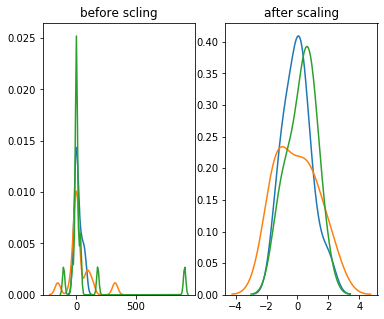

In [68]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(6,5))
ax1.set_title("before scling")
sns.kdeplot(x2[0],ax=ax1)
sns.kdeplot(x2[1],ax=ax1)
sns.kdeplot(x2[2],ax=ax1)
ax2.set_title("after scaling")
sns.kdeplot(x_train[0],ax=ax2)
sns.kdeplot(x_train[1],ax=ax2)
sns.kdeplot(x_train[2],ax=ax2)


In [69]:
'''
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': [ 'poly', 'sigmoid']}
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)
'''

"\nparam_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': [ 'poly', 'sigmoid']}\ngrid = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)\ngrid.fit(x_train,y_train)\n"

In [70]:
x_train1=x_train

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold,cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [72]:
models=[]
models.append(("SVR",SVR(kernel='rbf')))
models.append(("KNeighborsRegressor",KNeighborsRegressor()))
models.append(("Polynomial_regression",LinearRegression()))

for name,model in models:
    kfold=KFold(n_splits=10,random_state=7)
    if(name=="Polynomial_regression"):
        poly_features=PolynomialFeatures(degree=2)
        x_train1=poly_features.fit_transform(x_train1)
    cv_result=cross_val_score(model,x_train1,y_train,cv=kfold,scoring="neg_mean_squared_error")
    msg="%s:%f(%f)"%(name,cv_result.mean(),cv_result.std())
    print(msg)

SVR:-266666.275024(57684.777344)
KNeighborsRegressor:-34522.029471(8363.715131)
Polynomial_regression:-4818.346286(1469.658388)


In [77]:
svr1=SVR(kernel='sigmoid')
svr1.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='sigmoid', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [78]:
x_train.shape,x_test.shape

((675, 15), (169, 15))

In [79]:
y_pred=svr1.predict(x_test)

In [80]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [81]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

520.7641951047199


In [82]:
print(mean_squared_error(y_test,y_pred))

271195.34690306673


In [83]:
print(r2_score(y_test,y_pred))

0.05654370208104109


In [84]:
import matplotlib.pyplot as plt
errors=[]
ran=range(1,50)
for i in ran:
    knnr=KNeighborsRegressor(n_neighbors=i)
    knnr.fit(x_train,y_train)
    y_pred=knnr.predict(x_test)
    errors.append(np.sqrt(mean_squared_error(y_test,y_pred)))

Text(0, 0.5, 'root mean square error')

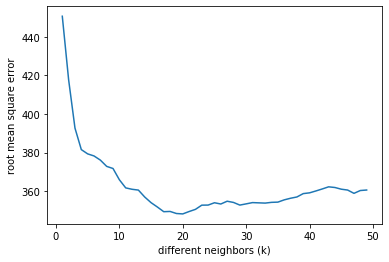

In [85]:
%matplotlib inline
plt.plot(ran,errors)
plt.xlabel("different neighbors (k)")
plt.ylabel("root mean square error")

In [86]:
knn=KNeighborsRegressor(n_neighbors=9)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,y_pred_knn)))
print(r2_score(y_test,y_pred_knn))

371.7102046242259
0.5193283345237446


In [87]:
x_train2=x_train

In [88]:
poly_features=PolynomialFeatures(degree=2)
x_train2=poly_features.fit_transform(x_train2)

In [89]:
poly=LinearRegression()
poly.fit(x_train2,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
x_test2=poly_features.fit_transform(x_test)

In [91]:
y_pred_poly=poly.predict(x_test2)

In [92]:
print(np.sqrt(mean_squared_error(y_test,y_pred_poly)))

2382.753454563979


In [93]:
print(r2_score(y_test,y_pred_poly))

-18.751394796413063


Text(0, 0.5, 'crossvalidation error')

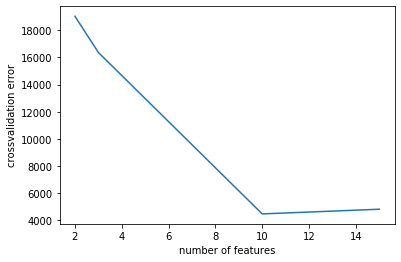

In [94]:
import matplotlib.pyplot as plt
pr=[19031.95,16369.3,4472,4818]
pr_sd=[4299.73,3457,1342,1469]
nc=[2,3,10,15]
plt.plot(nc,pr)
plt.xlabel("number of features")
plt.ylabel("crossvalidation error")

Text(0, 0.5, 'sd of crossvalidation error')

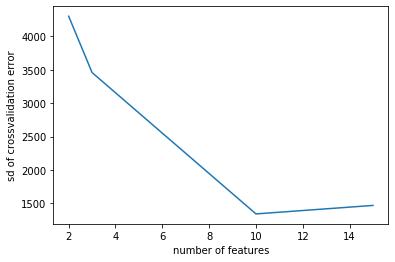

In [95]:
plt.plot(nc,pr_sd)
plt.xlabel("number of features")
plt.ylabel("sd of crossvalidation error")